In [1]:
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [2]:
horse_dark = cv2.imread("../DATA/horse.jpg")
horse_sgow = cv2.cvtColor(horse_dark, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread("../DATA/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread("../DATA/bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

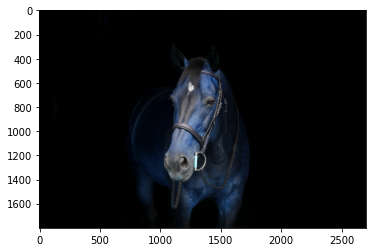

In [3]:
plt.imshow(horse_dark)

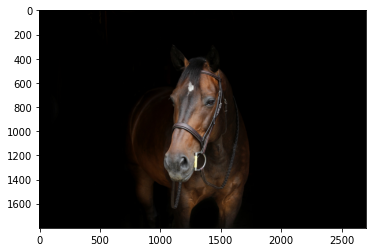

In [4]:
plt.imshow(horse_sgow)

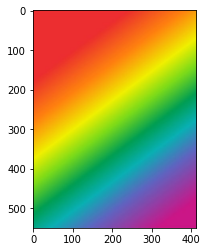

In [5]:
plt.imshow(show_rainbow)

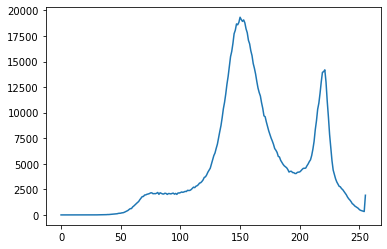

In [6]:
hist_values = cv2.calcHist([blue_bricks], channels = [0], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_values)

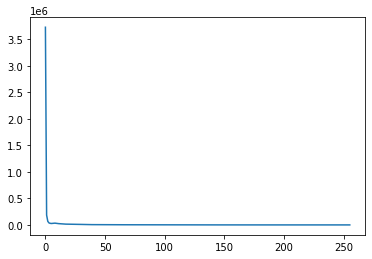

In [7]:
hist_values = cv2.calcHist([horse_dark], [0], None, [256], [0, 256])
plt.plot(hist_values)

# 3 Color Channel

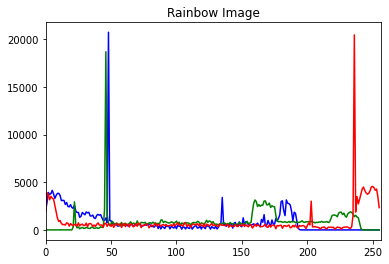

In [8]:
img = rainbow
color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title("Rainbow Image")
plt.show()

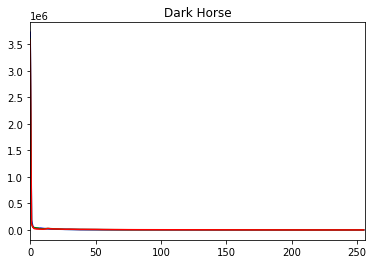

In [9]:
img = horse_dark
color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title("Dark Horse")
plt.show()

In [10]:
img = rainbow
img.shape

(550, 413, 3)

In [11]:
img.shape[0:2]

(550, 413)

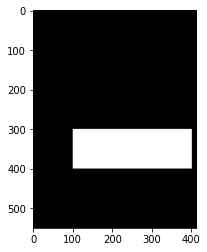

In [12]:
# Let us create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255
plt.imshow(mask, cmap='gray')

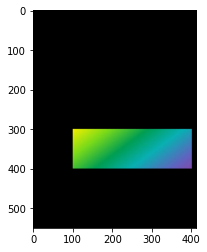

In [13]:
masked_img_show = cv2.bitwise_and(show_rainbow, show_rainbow, mask = mask)
plt.imshow(masked_img_show)

Text(0.5, 1.0, 'Histogram for RED values of the masked image')

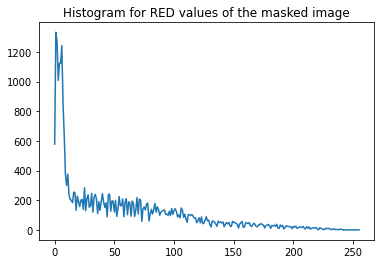

In [14]:
hist_values_mask = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
plt.plot(hist_values_mask)
plt.title('Histogram for RED values of the masked image')

Text(0.5, 1.0, 'Histogram for RED values of the full image')

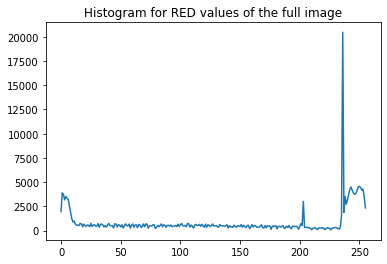

In [15]:
hist_values_mask = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values_mask)
plt.title('Histogram for RED values of the full image')

# Histogram Equalization

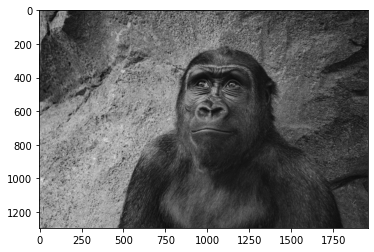

In [19]:
gorilla = cv2.imread("../DATA/gorilla.jpg", 0)
plt.imshow(gorilla, cmap='gray')

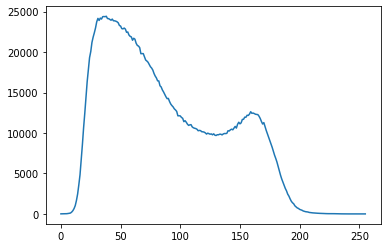

In [20]:
hist_values_gorilla = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values_gorilla)

# Equalize Histograms

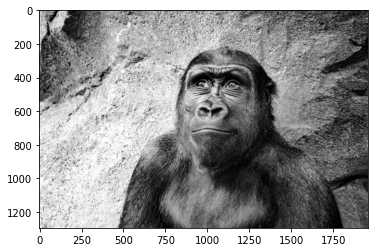

In [21]:
eq_gorilla = cv2.equalizeHist(gorilla)
plt.imshow(eq_gorilla, cmap='gray')

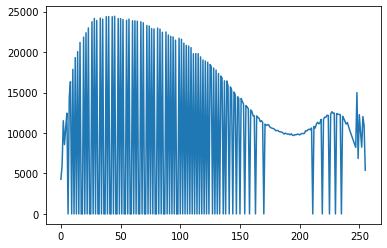

In [22]:
hist_values_gorilla = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values_gorilla)

# Gorilla Images

In [25]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

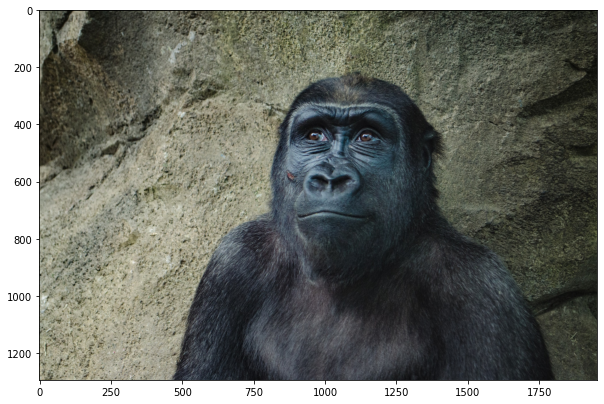

In [26]:
gorilla_bgr = cv2.imread("../DATA/gorilla.jpg")
gorilla_rgb = cv2.cvtColor(gorilla_bgr, cv2.COLOR_BGR2RGB)
display(gorilla_rgb)

In [33]:
gorilla_hsv = cv2.cvtColor(gorilla_bgr, cv2.COLOR_BGR2HSV)
gorilla_hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

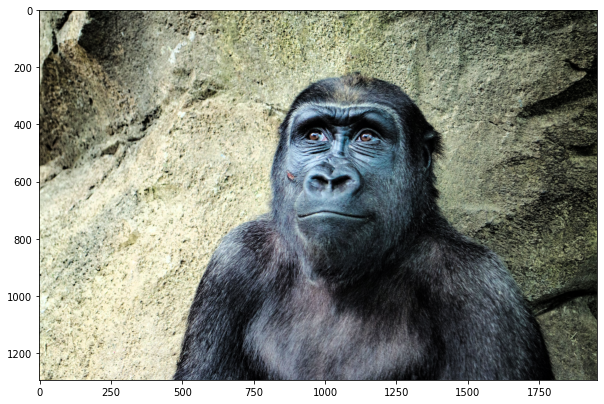

In [35]:
gorilla_hsv[:,:,2] = cv2.equalizeHist(gorilla_hsv[:,:,2]) # Equalize HSV --> V value of the histogram
gorilla_rgb = cv2.cvtColor(gorilla_hsv, cv2.COLOR_HSV2RGB)
display(gorilla_rgb)